In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier

In [8]:
df=pd.read_csv('pima-indians-diabetes.csv',names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#data exploration

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

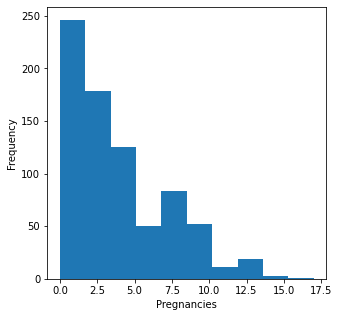

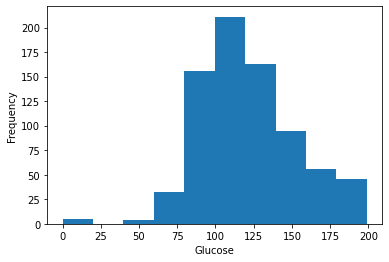

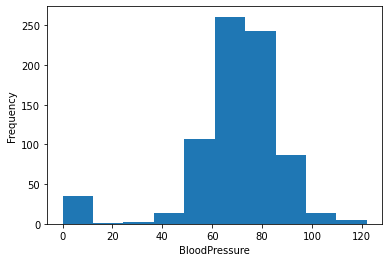

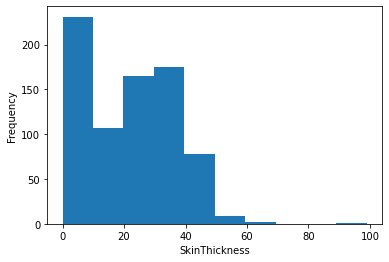

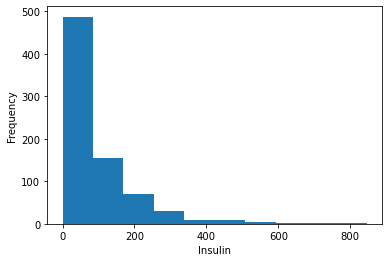

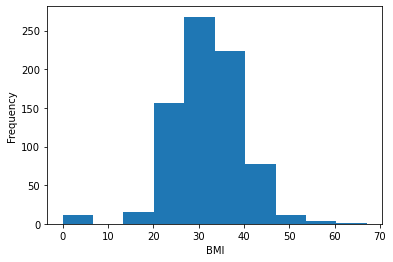

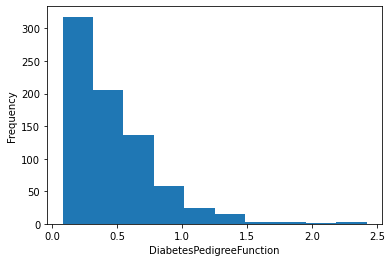

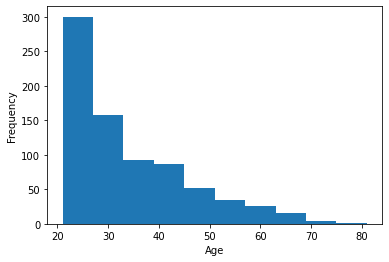

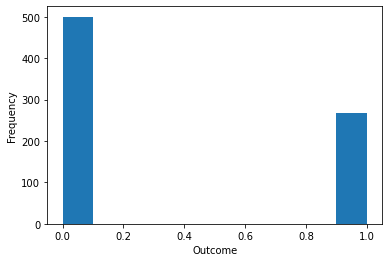

In [71]:
plt.figure(figsize=(5,5))
for names in df.columns:
    df[names].plot(kind='hist')
    plt.xlabel(names)
    plt.show()

In [26]:
x=df.drop(columns='Outcome',axis='columns')
y=df['Outcome']

In [ ]:
#scaling data 

In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
s=scale.fit_transform(x)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(s, y, stratify=y, random_state=10)

In [50]:
x_train.shape

(576, 8)

In [51]:
x_test.shape

(192, 8)

In [52]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [54]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [56]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.6979166666666666

In [59]:
print(cross_val_score(DecisionTreeClassifier(),s,y,cv=5).mean())

0.7253458959341312


In [66]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.5, 
    oob_score=True,
    random_state=0
)
bag_model.fit(x,y)
bag_model.oob_score_

0.7669270833333334

In [68]:
cross_val_score(bag_model,x,y,cv=5)

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])